# Diffusion-Reaction in a Slab Catalyst Pellet

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [2]:
# Model parameters

k=1e-3      #reaction rate constant, m3/kgcat.s
Deff=1e-6   #efective diffusivity, m2/s
Rhop=600    #pellet density, kg/m3
L=3e-3      #pellet half thickness, m


In [3]:
#Calculate Thiele modulus, phi
a=L      #characteristic length
phi=a * np.sqrt(Rhop*k/Deff)
print("phi= {:5.2f}".format(phi))


phi=  2.32


In [4]:
# Ordinary differential equations

def slODE(x, u):
    """
    slODE implements the governing bvps
    for reaction-diffusion in the slab pellet
    """    
    du=[ u[1],
        phi**2 * u[0]
    ]
    return np.vstack(du)
  

In [5]:
# Boundary conditions

def slBC(ua, ub):
    """
    slBC defines the boundary conditions BC
    for reaction-diffusion in the slab pellet
    """
    res=[ ua[1],
         ub[0] - 1.0 ]
    return np.array(res)

In [6]:
# Analytical solution

def ExactSol():
    """
    ExactSol calculates the exact solution for reaction-diffusion
    in a slab pellet
    Calculate u for 10 points along the pellet radius
    """
    xex = np.linspace(0, 1, 10)        # Create a vector of 10 points
    uex = np.cosh(phi*xex)/np.cosh(phi)  # Exact soln
    eta = np.tanh(phi)/phi;            # Effectiveness factor
    return xex, uex, eta


## Numerical Solution

In [7]:
# Initial guess
x_init = np.linspace(0, 1, 5)
u_init = np.zeros([2, x_init.size])  
u_init[0]=1.0

In [8]:
# Call solver
res_slab = solve_bvp(slODE, slBC, x_init, u_init, verbose=2)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.18e-03       0.00e+00           5              1       
       2          9.49e-04       0.00e+00           6              0       
Solved in 2 iterations, number of nodes 6. 
Maximum relative residual: 9.49e-04 
Maximum boundary residual: 0.00e+00


(0.0, 1.0, 0.0, 1.0)

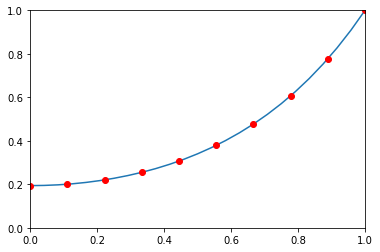

In [9]:
x_plot = np.linspace(0, 1, 25)
u_plot = res_slab.sol(x_plot)
plt.plot(x_plot, u_plot[0])

xex, uex, etax = ExactSol()
plt.plot(xex, uex, 'ro')

# Set axis limit
plt.axis((0, 1, 0, 1))

In [10]:
# Calculate effectiveness factor from solution
eta_calc= 1/phi**2 * res_slab.y[1,-1];
print("eta_calculated= {:5.2f}".format(eta_calc))
print("eta exact=      {:5.2f}".format(etax))

eta_calculated=  0.42
eta exact=       0.42
